## Load dependencies

In [2]:
import os
import numpy as np
import pandas as pd
import photofitness
from photofitness import display

In [17]:
# Load UV mitosis data:
folder = "/Users/esti/Documents/PROYECTOS/PHX/DOCS/MANUSCRIPT/CODE/"
path_data = os.path.join(folder, "data/mitosis_CHO_UV_clean.csv")
data = pd.read_csv(path_data)
print(len(data))

95348


## Estimation of cell densities for each field of view

Each well is 9.3 X 8.7 mm. Each FOV (the one in the final images) is 660 X 660 microns

- Area of each well: 80.91 mm^2
- Area of each FOV: 0.4356 mm ^2
- Total # of cells per well: 40000 per well
- Total# of cells per FOV: 215.35


In [22]:
well_area = 80.91
cell_density = 25000
fov_area = 660
fov_mm = (fov_area*0.001)**2
cell_mm = cell_density / well_area
cell_fov = cell_mm * fov_mm
print(cell_fov)

134.59399332591772


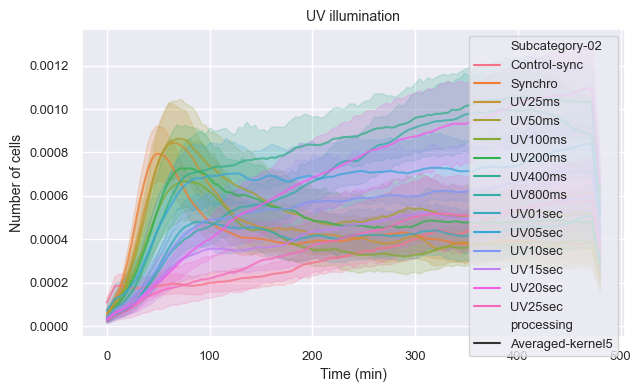

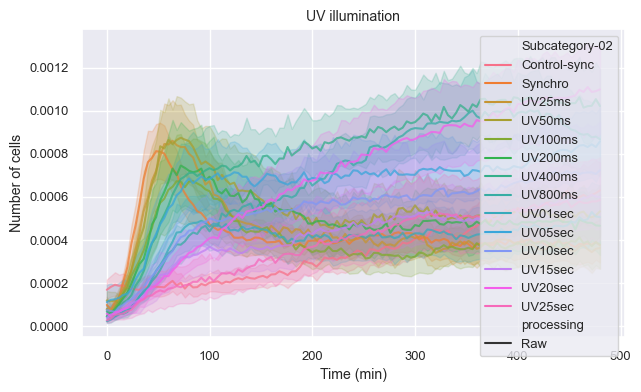

In [23]:
## Rename the columns to get the proper naming of the axis
data = data.rename(columns={'mitosis': 'Number of cells', 
                            'mitosis_normalised': 'Norm. Number of cells'})
## Choose a path to store the data:
output_path = folder 
## There is raw and smooth data. We show the smooth data (with a moving average of kernel 5) for the plots.
groups = np.unique(data["processing"])
## name of the variable to display in the plot.
y_var = "Number of cells" # "Norm. Number of cells" 
cell_fov = 134.59
norm = True 
if norm is True:
    data[y_var] = data[y_var]/cell_fov
format = 'pdf'

for g in groups:
    ploting_data = data[data["processing"]==g].reset_index(drop=True)
    title = "UV illumination"
    condition = "Subcategory-02"
    
    name = "{0}_{1}.{2}".format(y_var, g, format) # name we want to give to the plot
    hue_order = ['Control-sync', 'Synchro', 'UV25ms', 'UV50ms', 'UV100ms', 'UV200ms', 'UV400ms', 'UV800ms',
                 'UV01sec', 'UV05sec', 'UV10sec', 'UV15sec', 'UV20sec', 'UV25sec']
    display.plot_conditions(ploting_data, y_var, title, condition, output_path, name,
                    style_condition="processing", hue_order=hue_order)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_conditions(data, y_var, title, condition, output_path, name, style_condition="processing", hue_order=None):
    fig = plt.figure(figsize=(7, 4))
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.plotting_context("paper")
    sns.set_theme(style="ticks", rc=custom_params)
    # Plot the results per category
    #sns.set(font_scale=0.85)
    if hue_order is None:
        sns.lineplot(x="frame", y=y_var, hue=condition, style=style_condition, data=data,
                     palette=sns.color_palette("husl", 14), linewidth=1.5, alpha=0.75)
    else:
        sns.lineplot(x="frame", y=y_var, hue=condition, style=style_condition, data=data,
                     palette=sns.color_palette("husl", 14), linewidth=1.5, alpha=0.75, hue_order=hue_order)
    # plt.ylabel(y_label)
    plt.xlabel("Time (min)")
    plt.title(title)
    plt.legend(loc='upper right')
    format_extension = name.split(".")[-1]
    fig.savefig(os.path.join(output_path, name), format=format_extension, transparent=True)
    plt.show()
